In [0]:
# from google.colab import drive
# drive.mount('/content/gdrive')
# %matplotlib inline
# %cd /content/gdrive/My Drive/Colab Notebooks
# # %mkdir IOT_project
# %cd IOT_project
# # %mkdir dataset
# %ls

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive
/content/gdrive/My Drive/Colab Notebooks
/content/gdrive/My Drive/Colab Notebooks/IOT_project
data.pkl
features.pkl
parkinson_binary_feat_and_time_series.pth
parkinson_binary_time_series.pth
parkinson_multiclass_feat_and_time_series.pth


In [0]:
!ls

data.pkl
features.pkl
parkinson_binary_feat_and_time_series.pth
parkinson_binary_time_series.pth
parkinson_modules.py
parkinson_multiclass_feat_and_time_series.pth


In [0]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import scipy
import seaborn as sns
from scipy import signal
import parkinson_modules as pm
%matplotlib inline


In [0]:
time_df = pd.DataFrame()
acc_df = pd.DataFrame()
hyr_df = pd.DataFrame()
mag_df = pd.DataFrame()
df = pd.DataFrame()

In [0]:
!ls

data.pkl
features.pkl
Info.xlsx
parkinson_binary_feat_and_time_series.pth
parkinson_binary_time_series.pth
parkinson_modules.py
parkinson_multiclass_feat_and_time_series.pth
__pycache__


In [0]:
os.chdir('.')
info = pd.read_excel('Info.xlsx')
info = info.fillna(value = -1)
info.head(5)

,date,ID,ФИО,пол,возраст,Степень Паркинсона,Травмы/Патологии/Болезни,Баг в эксперименте1,Баг в эксперименте2,index1,index2
0,-1,1,Екатерина К,ж,24.0,-1,-1,-1,-1,"1,2,3,4,5,6,7,8,9,-1,10,11,12","1,2,3,4,5,6,7,8,9,-1,10,11,12"
1,-1,2,Анна Т,ж,23.0,-1,-1,-1,-1,"1,2,3,4,5,6,7,8,9,-1,10,11,12","1,2,3,4,5,6,7,8,9,-1,10,11,12"
2,-1,3,Александр Т,м,22.0,-1,-1,-1,-1,"1,2,3,4,5,6,7,8,9,-1,10,11,12","1,2,3,4,5,6,7,8,9,-1,10,11,12"
3,-1,4,Иван Д,м,24.0,-1,-1,-1,-1,"1,2,3,4,5,6,7,8,9,-1,10,11,12","1,2,3,4,5,6,7,8,9,-1,10,11,12"
4,-1,5,Дмитрий Е,м,24.0,-1,-1,-1,-1,"1,2,3,4,5,6,7,8,9,-1,10,11,12","1,2,3,4,5,6,7,8,9,-1,10,11,12"


In [0]:
np.array([8, 8, 6, 7, 5, 3, 28, 5, 55, 1000000, 215 , 15, 17])/1.5

array([5.33333333e+00, 5.33333333e+00, 4.00000000e+00, 4.66666667e+00,
       3.33333333e+00, 2.00000000e+00, 1.86666667e+01, 3.33333333e+00,
       3.66666667e+01, 6.66666667e+05, 1.43333333e+02, 1.00000000e+01,
       1.13333333e+01])

In [0]:
def calculate_batch(acc, hyr, mag, time, patient_info, name, dataframe, exer_keys, win_size = 2000):
    
    Data = pd.DataFrame()
    if len(time.values) < win_size:
        return Data
    else:
        count = 0
        for ind in range(0, len(time.values), win_size):
            if ind + win_size < len(time.values):
                df = pd.DataFrame()
#                                   data[ind: ind + win_size].reshape(1,-1), 
#                                   columns = np.arange(win_size), 
#                                   index = [dataframe.shape[0] + count])
                count += 1
                for key in acc.keys():
                    df[key] = [acc[key].values[ind: ind + win_size]]
                
                for key in hyr.keys():
                    df[key] = [hyr[key].values[ind: ind + win_size]]
                    
                for key in mag.keys():
                    df[key] = [mag[key].values[ind: ind + win_size]]
                df['time'] = [time.values[ind: ind + win_size]]
                df['name'] = name
                if patient_info['Степень Паркинсона'][index[0] - 1] in [-1, 'здоров', 'здоровый', 'здоровая']:
                    df['target'] = 0
                else:
                    df['target'] = patient_info['Степень Паркинсона'][index[0] - 1]
                df['exercise_index'] = exer_keys
                Data = Data.append(df, ignore_index=True)
        return Data

In [0]:
file = pd.DataFrame()
columns_acc = [
    "acc_x, mg",
    'acc_y, mg',
    'acc_z, mg'  
]
columns_hyr = [
    'gyr_x, dps',
    'gyr_y, dps',
    'gyr_z, dps'
]

columns_mag = [
    'mag_x, mga',
    'mag_y, mga',
    'mag_z, mga'
]

###Uncomment this, if you have data with parkinson's

In [0]:

# os.chdir('E:/parkinson')
# path = 'E:/parkinson/'
# feature = {}
# file = pd.DataFrame()
# list_files = os.listdir()
# count = 0
# for name in list_files:
#     if '.' not in name:
#         patient = pm.parkinson(path + name)
#         index = list(map(int, name.split('_')))
#         if len(index) == 1:
#             index.append(1)
#         patient_info = info[info['ID'] == index[0]]
#         indexes = list(map(int, patient_info['index' + str(index[1])][index[0] - 1].split(',')))
#         if True: #(patient_info['Баг в эксперименте' + str(index[1])][index[0] - 1] == -1):
#             patient.read(index = indexes)
#             print(name)
#             for exer_keys in patient.exercises:
#                 exers = patient.exercises[exer_keys]
#                 timing = patient.time[exer_keys]
#                 df = calculate_batch({key : exers[key] for key in columns_acc},
#                                      {key : exers[key] for key in columns_hyr},
#                                      {key : exers[key] for key in columns_mag},
#                                      timing, patient_info, name, file, exer_keys)
#                 file = file.append(df, ignore_index=True)
# #                     acc_df = acc_df.append(df)
# #                 for col in columns_hyr:
# #                     df = calculate_batch(np.array(exers[col]), patient_info, name, hyr_df, col)
# #                     hyr_df = hyr_df.append(df)
# #                 df = calculate_batch(np.array(timing), patient_info, name, time_df, 'Time')
# #                 time_df = time_df.append(df)
# #             A = patient.to_dict()            
# #             col = list(A.keys())
# #             val = list(A.values())
# #             df = pd.DataFrame(np.array(val).reshape(1,-1),
# #                           columns = col, index = [count], dtype = np.float32)
# #             if patient_info['Степень Паркинсона'][index[0] - 1] in [-1, 'здоров', 'здоровый', 'здоровая']:
# #                 df['target'] = 0
# #                 print(name, 'correct', patient_info['Степень Паркинсона'][index[0] - 1], df['target'][count],
# #                       max( list( map(len, patient.time.values()) ) ) )
# #             else:
# #                 df['target'] = 1
# #                 print(name, 'correct', patient_info['Степень Паркинсона'][index[0] - 1], df['target'][count],
# #                      max( list( map(len, patient.time.values()) ) ) )
# #             df['name'] = name
# #             file = file.append(df)
# #             count += 1
# #         else:
# #             print(name, 'incorrect')

In [0]:
# os.chdir(path)
file = pd.read_pickle('data.pkl')

In [0]:
file

,"acc_x, mg","acc_y, mg","acc_z, mg","gyr_x, dps","gyr_y, dps","gyr_z, dps","mag_x, mga","mag_y, mga","mag_z, mga",time,name,target,exercise_index
0,"[0.0, 0.0, -166.0, -151.0, -133.0, -128.0, -14...","[0.0, 0.0, -192.0, -216.0, -233.0, -233.0, -23...","[0.0, 0.0, 990.0, 989.0, 978.0, 979.0, 966.0, ...","[-13.1, -11.8, -12.2, -11.4, -10.8, -9.3, -6.2...","[4.9, -3.3, -7.2, -5.1, -4.7, -3.3, -1.5, -0.7...","[-2.3000000000000003, 0.3, -0.7, -2.8, -2.5, -...","[-190.0, -379.0, -192.0, -193.0, -183.0, -189....","[-1114.0, -2225.0, -1117.0, -1111.0, -1119.0, ...","[-244.0, -482.0, -235.0, -232.0, -237.0, -235....","[0.04071974754333496, 0.05296977361043295, 0.0...",01,0,10
1,"[-279.0, -294.0, -265.0, -307.0, -100.0, -198....","[-108.0, -112.0, -123.0, -128.0, -324.0, -147....","[919.0, 947.0, 992.0, 1000.0, 1056.0, 947.0, 8...","[12.4, 6.4, 5.3, -0.4, 5.4, 25.1, 2.5, -9.1, 3...","[-15.0, -15.4, -2.3, 0.0, -2.4, 21.7, 26.1, 5....","[5.1, -0.8, -10.9, -13.6, -9.3, -13.8, -17.1, ...","[-226.0, -222.0, -219.0, -214.0, -216.0, -219....","[-1015.0, -1024.0, -1023.0, -1023.0, -1020.0, ...","[-249.0, -241.0, -241.0, -234.0, -234.0, -235....","[20.059341033299766, 20.077045758565266, 20.07...",01,0,10
2,"[0.0, 0.0, 253.0, 253.0, 254.0, 252.0, 254.0, ...","[0.0, 0.0, -378.0, -379.0, -377.0, -377.0, -37...","[0.0, 0.0, 907.0, 906.0, 907.0, 906.0, 906.0, ...","[1.8, 0.7, 0.6, 0.7, 0.8, 0.8, 0.7, 0.7, 0.7, ...","[-3.3, -1.7, -1.8, -1.8, -1.8, -1.8, -1.8, -1....","[-7.5, -3.8, -3.8, -3.8, -3.7, -3.7, -3.8, -3....","[-82.0, -172.0, -88.0, -85.0, -84.0, -78.0, -8...","[-1383.0, -2752.0, -1386.0, -1377.0, -1384.0, ...","[-154.0, -316.0, -157.0, -157.0, -156.0, -157....","[0.040955384572347014, 0.05519811312357584, 0....",01,0,11
3,"[-1032.0, -883.0, -486.0, -1011.0, -1112.0, -6...","[-660.0, -595.0, -293.0, -284.0, -302.0, -408....","[-342.0, -467.0, -755.0, -66.0, -444.0, -427.0...","[-3.2, 14.0, 80.5, 68.6, 42.0, 38.7, 26.8, 28....","[0.1, -14.9, 3.0, 5.8, -3.7, -36.0, -36.8, -26...","[15.5, 27.3, 18.3, -7.8, 7.4, -0.2, -8.2, -14....","[123.0, 121.0, 115.0, 115.0, 105.0, 112.0, 106...","[-487.0, -484.0, -484.0, -484.0, -480.0, -484....","[126.0, 126.0, 108.0, 115.0, 117.0, 103.0, 106...","[20.058665831883744, 20.077267408370968, 20.07...",01,0,11
4,"[0.0, 0.0, 1090.0, 1136.0, 1082.0, 1053.0, 108...","[0.0, 0.0, -202.0, -282.0, -138.0, 3.0, 125.0,...","[0.0, 0.0, 120.0, 93.0, 119.0, 155.0, 193.0, 2...","[-333.9, -184.5, -148.9, -55.6, -9.3, 26.2, 49...","[-21.700000000000006, 19.3, 46.9, 49.9, 47.6, ...","[6.5, 12.9, 30.4, 57.8, 70.7, 82.6, 92.5, 97.8...","[-46.0, -106.0, -36.0, -37.0, -25.0, -12.0, -7...","[-1576.0, -3152.0, -1579.0, -1575.0, -1578.0, ...","[276.0, 570.0, 280.0, 271.0, 267.0, 271.0, 253...","[0.040806214014689125, 0.055230538050333663, 0...",01,0,2
5,"[-123.0, -125.0, -109.0, -80.0, -78.0, -68.0, ...","[-383.0, -375.0, -365.0, -355.0, -320.0, -310....","[-1135.0, -1132.0, -1129.0, -1117.0, -1109.0, ...","[-173.8, -148.0, -123.8, -100.9, -81.9, -67.2,...","[10.5, 10.2, 11.6, 15.6, 21.0, 23.7, 24.6, 22....","[23.2, 18.6, 14.7, 10.3, 6.1, 2.5, 0.2, -0.2, ...","[-4.0, -22.0, -37.0, -54.0, -54.0, -66.0, -69....","[-751.0, -742.0, -748.0, -748.0, -747.0, -751....","[829.0, 841.0, 840.0, 843.0, 840.0, 841.0, 840...","[20.059596935908, 20.077154318491623, 20.07869...",01,0,2
6,"[0.0, 0.0, -82.0, -76.0, -71.0, -72.0, -73.0, ...","[0.0, 0.0, -445.0, -444.0, -450.0, -446.0, -44...","[0.0, 0.0, 901.0, 913.0, 916.0, 914.0, 913.0, ...","[-2.0, 1.2, 4.5, 2.3, 0.9, 0.1, -0.7, -0.6, 0....","[-3.8, -0.7, -0.1, -2.3, -2.7, -2.5, -2.2, -2....","[-7.7, -2.8, -2.7, -3.0, -2.8, -2.7, -2.5, -2....","[66.0, 138.0, 64.0, 70.0, 73.0, 67.0, 63.0, 61...","[-1065.0, -2134.0, -1063.0, -1060.0, -1068.0, ...","[-309.0, -618.0, -321.0, -310.0, -307.0, -315....","[0.0410605271657308, 0.056620200475056975, 0.0...",01,0,6
7,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1093.0, 1197.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 925.0, 799.0, 7...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 362.0, 2

In [0]:
features = pd.DataFrame()
import parkinson_modules as pm


In [0]:
keys = columns_acc + columns_hyr + columns_mag

###Create feature dataset

In [0]:
for i in file.index:
    feature_one_sensor = {}
    for key in keys:
        feature_one_sensor.update(pm.calculate_feature(pd.DataFrame(file['time'][i]),
                                                  pd.DataFrame(file[key][i]),
                                                  label = key, calculate_fourier_feature= True)
                                 )
    df = pd.DataFrame(feature_one_sensor)
#     print(df)
    df['target'] = file['target'][i]
    features = features.append(df, ignore_index= True)
#     print(features)
#     break
    if i % 100 == 0:
        print(i)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800


In [0]:
# features.to_pickle('features.pkl')

In [0]:
# features = pd.read_csv('features.pkl')

In [0]:
features = features[features['target'] != 'тремор']

In [0]:
X = features.drop(columns= ['target'])
y = features['target']
y = y.map({0 : 0, 'П(2)' : 1, 'П(3)' : 2, 'тремор' : 4, 'П(1)' : 3})
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42, shuffle = True)

In [0]:
import warnings
warnings.filterwarnings("ignore")

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators': np.arange(200, 501, 100), 'max_depth' : np.arange(10, 61, 10)}
RFС = RandomForestClassifier(n_estimators = 500, max_depth = 50)
SVM = SVC(kernel = 'poly')
NB = GaussianNB()
LR =LogisticRegression()
DT = DecisionTreeClassifier(max_depth = 100)
classifiers = {
     'RF' : RF,
     'SVM' : SVM,
     'NB' : NB,
     'LR' : LR,
     'DT' : DT    
}

In [0]:
best_params = {}
for key in classifiers:
    model = classifiers[key]
    model.fit(X_train, y_train)
#     best_params[key] = model.best_params_
    y_pred = model.predict(X_test)
    print(key, accuracy_score(y_pred, y_test), balanced_accuracy_score(y_pred, y_test))

RF 0.6722222222222223 0.7400205114340961
SVM 0.6537037037037037 0.515403688247354
NB 0.387037037037037 0.38924767375679536
LR 0.6648148148148149 0.5504369434091768
DT 0.6296296296296297 0.5281900838337965


In [0]:
dct = pd.Series(classifiers['RF'].feature_importances_, index = X.columns).sort_values(ascending = False)
dct

mag_y, mga_mean                          0.053159
mag_z, mga_mean                          0.045800
gyr_x, dps_noise_peaks_freq_mean         0.030442
acc_x, mg_noise_peaks_freq_std           0.020910
gyr_y, dps_noise_peaks_freq_mean         0.019357
acc_y, mg_noise_peaks_freq_std           0.017256
acc_y, mg_mean                           0.017183
acc_x, mg_noise_peaks_amplitude_mean     0.013823
mag_x, mga_mean                          0.013762
gyr_z, dps_noise_peaks_freq_mean         0.013441
mag_z, mga_std                           0.012644
mag_x, mga_std                           0.012473
gyr_y, dps_std                           0.011783
acc_x, mg_noise_peaks_freq_mean          0.011400
acc_y, mg_std                            0.011269
gyr_z, dps_std_without_trend             0.010801
gyr_x, dps_std_without_trend             0.010787
gyr_y, dps_differential_std              0.010737
gyr_z, dps_noise_peaks_amplitude_std     0.010427
acc_y, mg_trend_spectrum_energy_std      0.010305


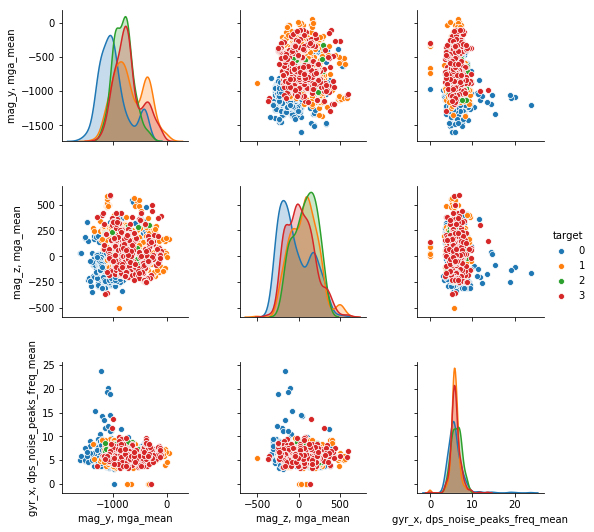

In [0]:
dct.index[:3]
newdf = pd.DataFrame()
for i in dct.index[:3]:
    newdf[i] = X[i]
newdf['target'] = y

sns.pairplot(data=newdf, vars= dct.index[:3], hue = "target")
plt.show()

In [0]:
X = features.drop(columns= ['target'])
y = features['target']
y = y.map({0 : 0, 'П(2)' : 1, 'П(3)' : 1, 'тремор' : 1, 'П(1)' : 1})
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42, shuffle = True)

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators': np.arange(200, 501, 100), 'max_depth' : np.arange(10, 61, 10)}
RFС = RandomForestClassifier(n_estimators = 500, max_depth = 50)
SVM = SVC(kernel = 'poly')
NB = GaussianNB()
LR =LogisticRegression()
DT = DecisionTreeClassifier(max_depth = 100)
classifiers = {
     'RF' : RF,
     'SVM' : SVM,
     'NB' : NB,
     'LR' : LR,
     'DT' : DT    
}

In [0]:
best_params = {}
for key in classifiers:
    model = classifiers[key]
    model.fit(X_train, y_train)
#     best_params[key] = model.best_params_
    y_pred = model.predict(X_test)
    print(key, accuracy_score(y_pred, y_test), balanced_accuracy_score(y_pred, y_test))

RF 0.8759259259259259 0.8691377625793845
SVM 0.8666666666666667 0.8571428571428571
NB 0.7 0.6911730241663105
LR 0.8888888888888888 0.8831366577845452
DT 0.8462962962962963 0.8329346092503987


In [0]:
dct = pd.Series(classifiers['RF'].feature_importances_, index = X.columns).sort_values(ascending = False)
dct

mag_y, mga_mean                          0.127095
mag_z, mga_mean                          0.036868
gyr_x, dps_noise_peaks_freq_mean         0.024959
acc_x, mg_trend_spectrum_energy_std      0.023268
gyr_y, dps_noise_peaks_freq_std          0.023182
mag_x, mga_std                           0.021752
gyr_y, dps_noise_peaks_freq_mean         0.020109
acc_x, mg_noise_peaks_freq_std           0.019697
acc_x, mg_noise_peaks_freq_mean          0.016426
acc_z, mg_mean                           0.016233
acc_y, mg_noise_peaks_freq_mean          0.015608
acc_x, mg_mean                           0.014720
gyr_x, dps_std                           0.014657
gyr_y, dps_trend_peaks_freq_mean         0.013100
mag_z, mga_std                           0.012419
mag_x, mga_mean                          0.012274
mag_x, mga_noise_peaks_freq_mean         0.012227
mag_y, mga_noise_peaks_freq_std          0.011900
gyr_z, dps_noise_peaks_freq_std          0.011645
gyr_x, dps_skew                          0.011507


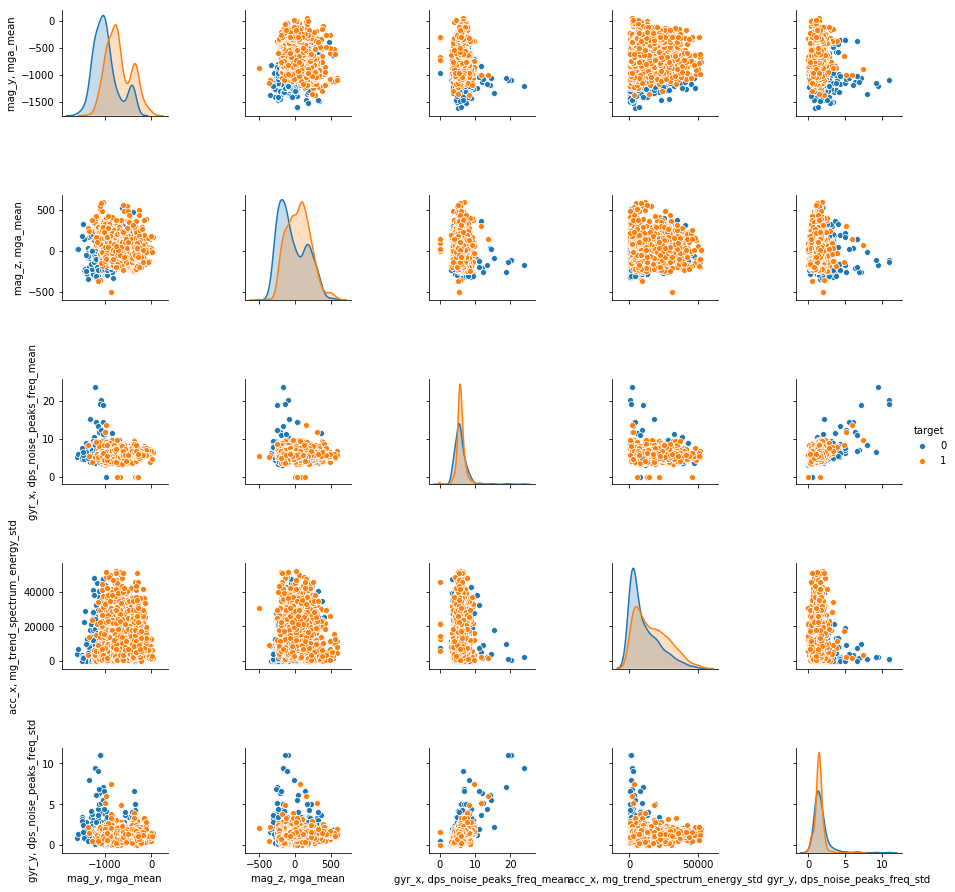

In [0]:
dct.index[:3]
newdf = pd.DataFrame()
for i in dct.index[:5]:
    newdf[i] = X[i]
newdf['target'] = y

sns.pairplot(data=newdf, vars= dct.index[:5], hue = "target")
plt.show()

5.115162 1.4687786
6.382715 1.3032583


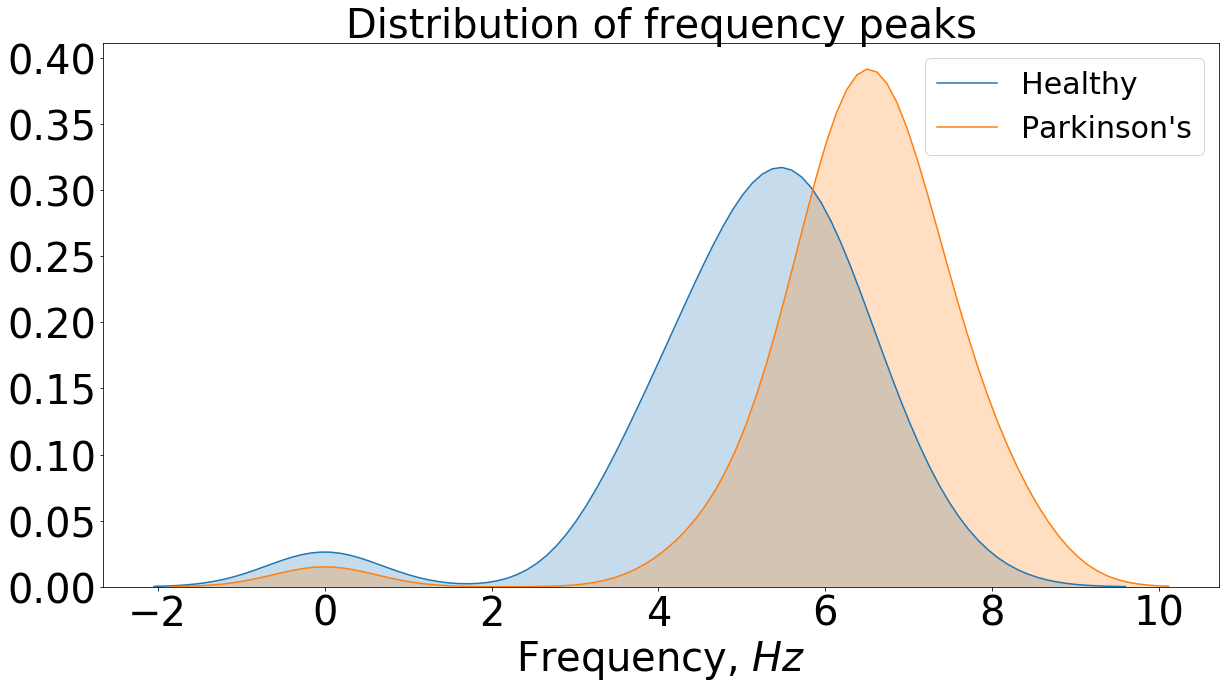

In [0]:
plt.figure(figsize = (20, 10))
sns.kdeplot(file[file['target'] == 0]['2 acc_x, mg_noise_peaks_freq_mean'].values, shade = True, label = 'Healthy')
sns.kdeplot(file[file['target'] == 1]['2 acc_x, mg_noise_peaks_freq_mean'].values, shade = True, label = "Parkinson's")
plt.xticks(fontsize = 40)
plt.yticks(fontsize = 40)
plt.title('Distribution of frequency peaks', fontsize = 40)
plt.xlabel("Frequency, $Hz$", fontsize = 40)
plt.legend(fontsize = 30)
plt.savefig('C:/Users/1/Desktop/Frequency_peaks_acc_x.jpg')
print(file[file['target'] == 0]['2 acc_x, mg_noise_peaks_freq_mean'].mean(),
      file[file['target'] == 0]['2 acc_x, mg_noise_peaks_freq_mean'].std())


print(file[file['target'] == 1]['2 acc_x, mg_noise_peaks_freq_mean'].mean(),
      file[file['target'] == 1]['2 acc_x, mg_noise_peaks_freq_mean'].std())

4.4677415 1.2478324
6.196414 1.522145


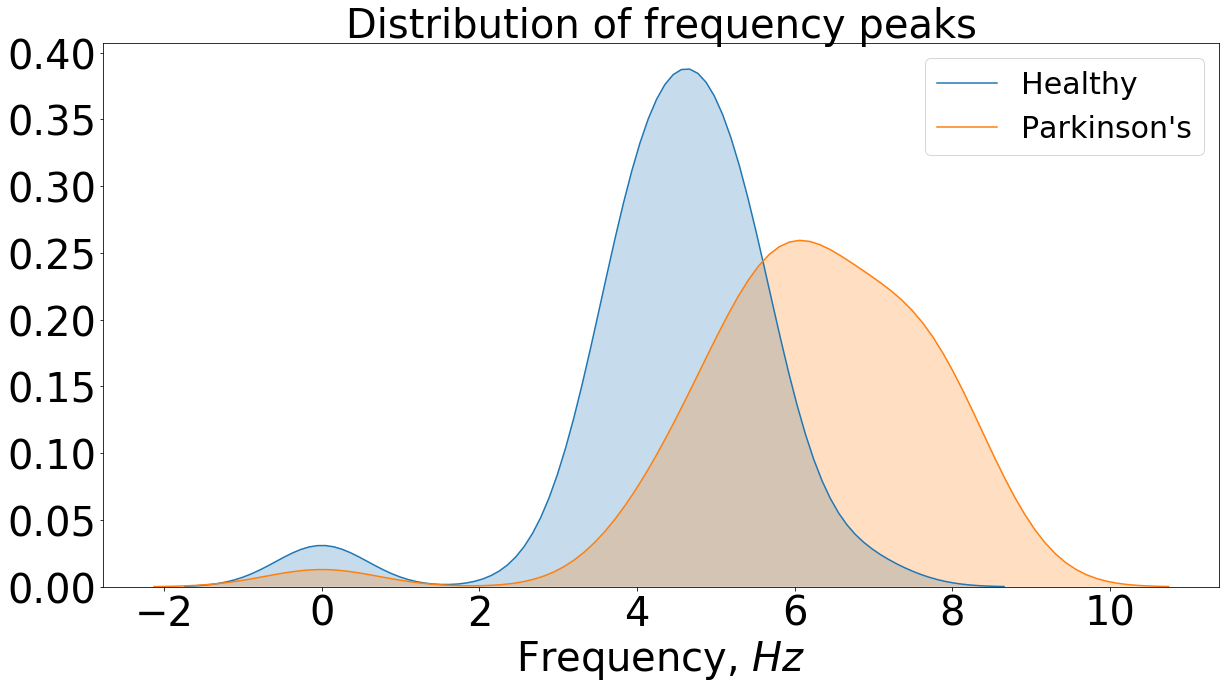

In [0]:
plt.figure(figsize = (20, 10))
sns.kdeplot(file[file['target'] == 0]['2 acc_y, mg_noise_peaks_freq_mean'].values, shade = True, label = 'Healthy')
sns.kdeplot(file[file['target'] == 1]['2 acc_y, mg_noise_peaks_freq_mean'].values, shade = True, label = "Parkinson's")
plt.xticks(fontsize = 40)
plt.yticks(fontsize = 40)
plt.title('Distribution of frequency peaks', fontsize = 40)
plt.xlabel("Frequency, $Hz$", fontsize = 40)
plt.legend(fontsize = 30)
plt.savefig('C:/Users/1/Desktop/Frequency_peaks_acc_y.jpg')
print(file[file['target'] == 0]['2 acc_y, mg_noise_peaks_freq_mean'].mean(),
      file[file['target'] == 0]['2 acc_y, mg_noise_peaks_freq_mean'].std())


print(file[file['target'] == 1]['2 acc_y, mg_noise_peaks_freq_mean'].mean(),
      file[file['target'] == 1]['2 acc_y, mg_noise_peaks_freq_mean'].std())

4.5771413 0.7010341
5.5728893 0.84241873


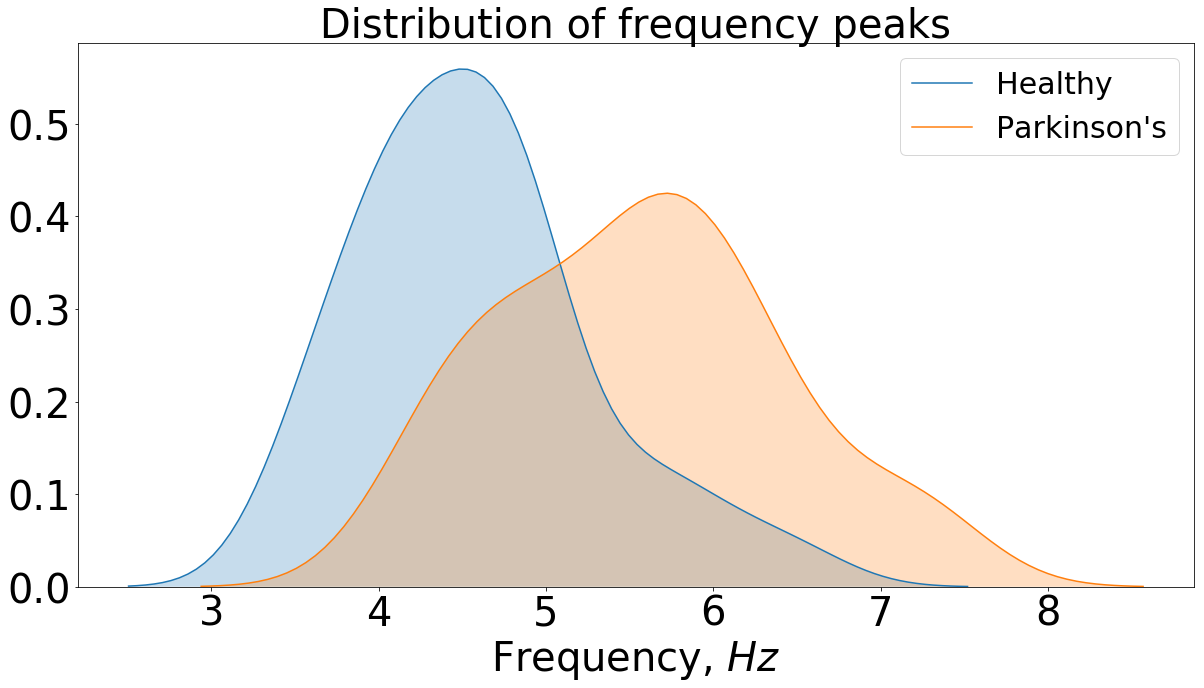

In [0]:
plt.figure(figsize = (20, 10))
sns.kdeplot(file[file['target'] == 0]['7 acc_z, mg_noise_peaks_freq_mean'].values, shade = True, label = 'Healthy')
sns.kdeplot(file[file['target'] == 1]['7 acc_z, mg_noise_peaks_freq_mean'].values, shade = True, label = "Parkinson's")
plt.xticks(fontsize = 40)
plt.yticks(fontsize = 40)
plt.title('Distribution of frequency peaks', fontsize = 40)
plt.xlabel("Frequency, $Hz$", fontsize = 40)
plt.legend(fontsize = 30)
plt.savefig('C:/Users/1/Desktop/Frequency_peaks_acc_z.jpg')
print(file[file['target'] == 0]['7 acc_z, mg_noise_peaks_freq_mean'].mean(),
      file[file['target'] == 0]['7 acc_z, mg_noise_peaks_freq_mean'].std())


print(file[file['target'] == 1]['7 acc_z, mg_noise_peaks_freq_mean'].mean(),
      file[file['target'] == 1]['7 acc_z, mg_noise_peaks_freq_mean'].std())

1.8939332 0.6760681
3.037202 1.2459984


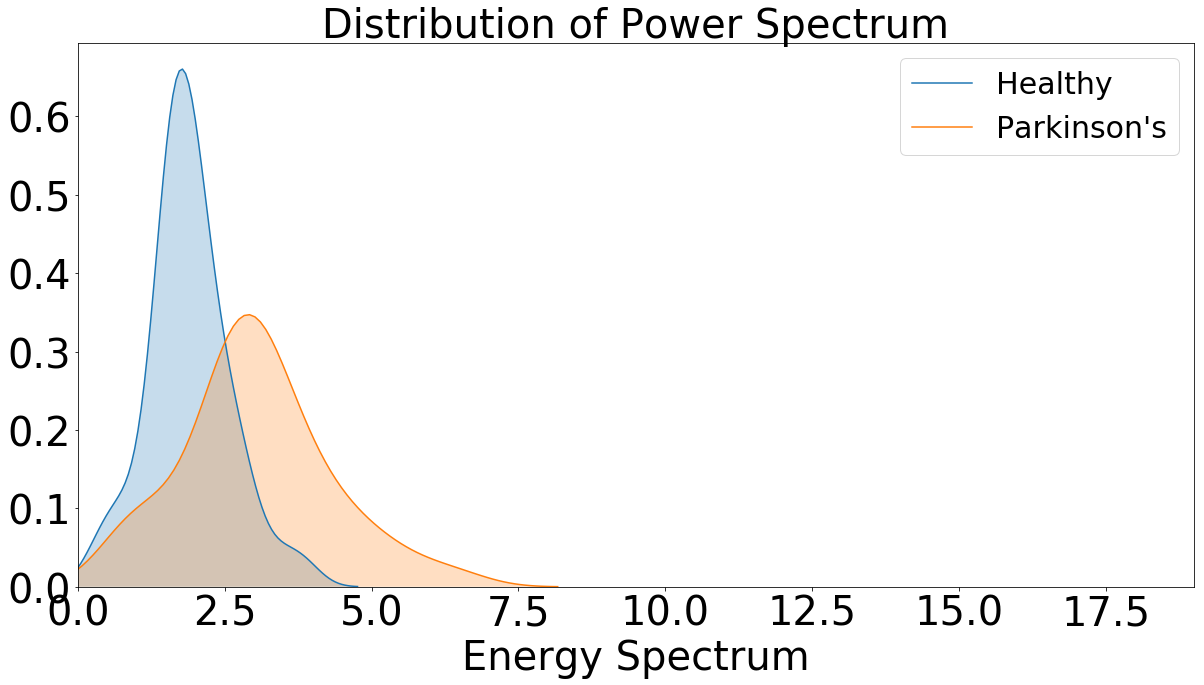

In [0]:
plt.figure(figsize = (20, 10))
a = file[file['target'] == 0]['6 acc_x, mg_noise_spectrum_energy_mean'].max()
sns.kdeplot(np.abs(file[file['target'] == 0]['6 acc_x, mg_trend_spectrum_energy_mean']).values/a, shade = True, label = 'Healthy')
sns.kdeplot(np.abs(file[file['target'] == 1]['6 acc_x, mg_trend_spectrum_energy_mean']).values/a, shade = True, label = "Parkinson's")
plt.xticks(fontsize = 40)
plt.yticks(fontsize = 40)
plt.title('Distribution of Power Spectrum', fontsize = 40)
plt.xlabel("Energy Spectrum", fontsize = 40)
plt.xlim(0, 19)
plt.legend(fontsize = 30)
plt.savefig('C:/Users/1/Desktop/spectrum_energy.jpg')
print(file[file['target'] == 0]['6 acc_x, mg_trend_spectrum_energy_mean'].mean()/a,
      file[file['target'] == 0]['6 acc_x, mg_trend_spectrum_energy_mean'].std()/a)


print(file[file['target'] == 1]['6 acc_x, mg_trend_spectrum_energy_mean'].mean()/a,
      file[file['target'] == 1]['6 acc_x, mg_trend_spectrum_energy_mean'].std()/a)

In [0]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators = 100, max_depth= 3)

In [0]:
RF.fit(X, Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [0]:
dct = pd.Series(RF.feature_importances_, index = X.columns).sort_values(ascending = False)

In [0]:
for key in dct.keys()[:40]:
    if 'freq' in key:
        a = 1
    else:
        a = file_drop[key].max()
#     if 'trend' not in key:
    print(key, '\n',
          file_drop[file_drop['target'] == 0][key].mean()/a, file_drop[file_drop['target'] == 0][key].std()/a,
          file_drop[file_drop['target'] == 1][key].mean()/a, file_drop[file_drop['target'] == 1][key].std()/a)

10 acc_z, mg_noise_peaks_freq_mean 
 13.627850532531738 6.533305644989014 8.618415832519531 2.9156570434570312
7 acc_y, mg_trend_spectrum_energy_std 
 0.22983158 0.14937022 0.48228455 0.23345686
2 acc_y, mg_noise_peaks_freq_mean 
 4.4677414894104 1.2478324174880981 6.196413993835449 1.5221450328826904
6 acc_y, mg_trend_spectrum_energy_mean 
 0.31645054 0.12252478 0.52725786 0.1979433
7 acc_x, mg_trend_spectrum_energy_mean 
 0.21679673 0.09634453 0.39452282 0.17596163
10 acc_y, mg_noise_peaks_freq_mean 
 15.252882957458496 6.818573951721191 9.739928245544434 4.458822727203369
7 acc_z, mg_trend_spectrum_energy_mean 
 0.23103733 0.10016943 0.42059433 0.18073528
7 acc_z, mg_trend_spectrum_energy_std 
 0.11828394 0.07576683 0.296069 0.18046007
7 acc_y, mg_trend_spectrum_energy_mean 
 0.25191283 0.10451218 0.44377652 0.17705277
6 acc_x, mg_trend_spectrum_energy_std 
 0.13330491 0.08354062 0.33557042 0.23259775
6 acc_z, mg_trend_spectrum_energy_std 
 0.09954058 0.06146214 0.27015695 0.2207497

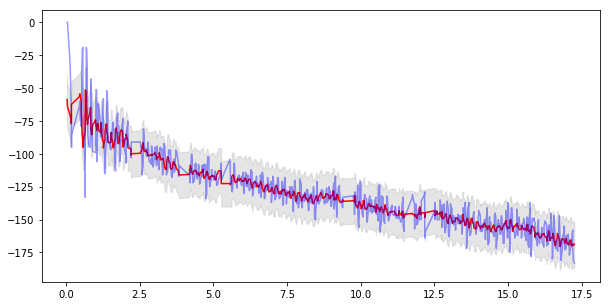

In [0]:
# os.mkdir("pic")
path = 'E:/parkinson/21'
patient = pm.parkinson(path)
patient.read()
pm.plot_mean_and_variance(patient.exercises[7]['acc_y, mg'], patient.time[7], l =1500)

In [0]:
pm.calculate_feature(patient.time[6], patient.exercises[6]['acc_y, mg'])

[0.01408513 0.01712187 0.04103065 ... 0.00111636 0.0177203  0.00148463]
[ 0.16521692  0.16601491  0.18337989 ... 35.26577059 35.2834909
 35.28497553]
[ 0.16521692  0.16601491  0.18337989 ... 35.26577059 35.2834909
 35.28497553]


{'std': 227.34473228417863,
 'mean': -487.9608399545971,
 'differential_mean': 158.23330007477404,
 'differential_std': 61271.26834666217,
 'std_without_trend': 135.44149682492235,
 'mean_without_trend': 135.44149682492235,
 'noise_peaks_freq_mean': 7.99910744998305,
 'noise_peaks_freq_std': 1.9700764010342224,
 'noise_peaks_amplitude_mean': 28041.323843713013,
 'noise_peaks_amplitude_std': 10410.29083594281,
 'noise_spectrum_energy_mean': 64385186.504132226,
 'noise_spectrum_energy_std': 214141513.41013288,
 'trend_spectrum_energy_mean': 963058492.760331,
 'trend_spectrum_energy_std': 49733091404.10661}

In [0]:
import scipy.signal as signal
a = (patient.exercises[7]['acc_y, mg'] - patient.exercises[7]['acc_y, mg'].rolling(window= 11).mean())[10:]
fft_data = np.abs(np.fft.fft(a))
fft_freq = np.fft.fftfreq(len(fft_data), 0.01)
peaks, _ = signal.find_peaks(fft_data, fft_data.mean() + 2*np.std(fft_data))

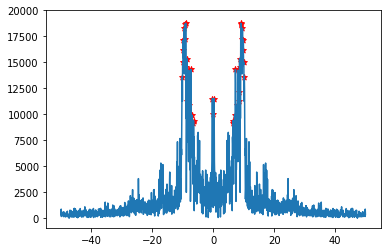

In [0]:
labels = np.argsort(fft_freq)
plt.plot(fft_freq[labels], fft_data[labels])
plt.scatter(fft_freq[peaks], fft_data[peaks], c = 'r', marker= '*')

In [0]:
peaks_label = np.argsort(np.abs(fft_freq[peaks]))
print(np.mean(np.abs(fft_freq[peaks])[peaks_label] [np.abs(fft_freq[peaks])[peaks_label] > 3]),
np.std(np.abs(fft_freq[peaks])[peaks_label] [np.abs(fft_freq[peaks])[peaks_label] > 3]))

8.508624005206945 1.1792700443917785


In [0]:
patient.exercises[7]['acc_y, mg']

0         0.0
1         0.0
2      -732.0
3      -764.0
4      -764.0
5      -740.0
6      -738.0
7      -753.0
8      -765.0
9      -802.0
10     -807.0
11     -795.0
12     -783.0
13     -768.0
14     -758.0
15     -748.0
16     -704.0
17     -692.0
18     -677.0
19     -702.0
20     -733.0
21     -781.0
22     -822.0
23     -863.0
24     -824.0
25     -795.0
26     -791.0
27     -776.0
28     -754.0
29     -746.0
        ...  
1759   -622.0
1760   -603.0
1761   -553.0
1762   -562.0
1763   -587.0
1764   -629.0
1765   -664.0
1766   -671.0
1767   -649.0
1768   -614.0
1769   -587.0
1770   -569.0
1771   -571.0
1772   -622.0
1773   -622.0
1774   -574.0
1775   -570.0
1776   -596.0
1777   -630.0
1778   -566.0
1779   -379.0
1780   -404.0
1781   -437.0
1782   -477.0
1783   -503.0
1784   -548.0
1785   -564.0
1786   -536.0
1787   -535.0
1788   -500.0
Name: acc_y, mg, Length: 1789, dtype: float64

In [0]:
os.chdir("E:/parkinson/21")
t_start = [0, 1000000, 30, 3.333, 5, 0, 0, 0, 37, 1000000, 6 , 20, 28]
len(t_start)

13

In [0]:
def ff(a):
    return np.mean(np.abs(a[1:] - a[:-1]))

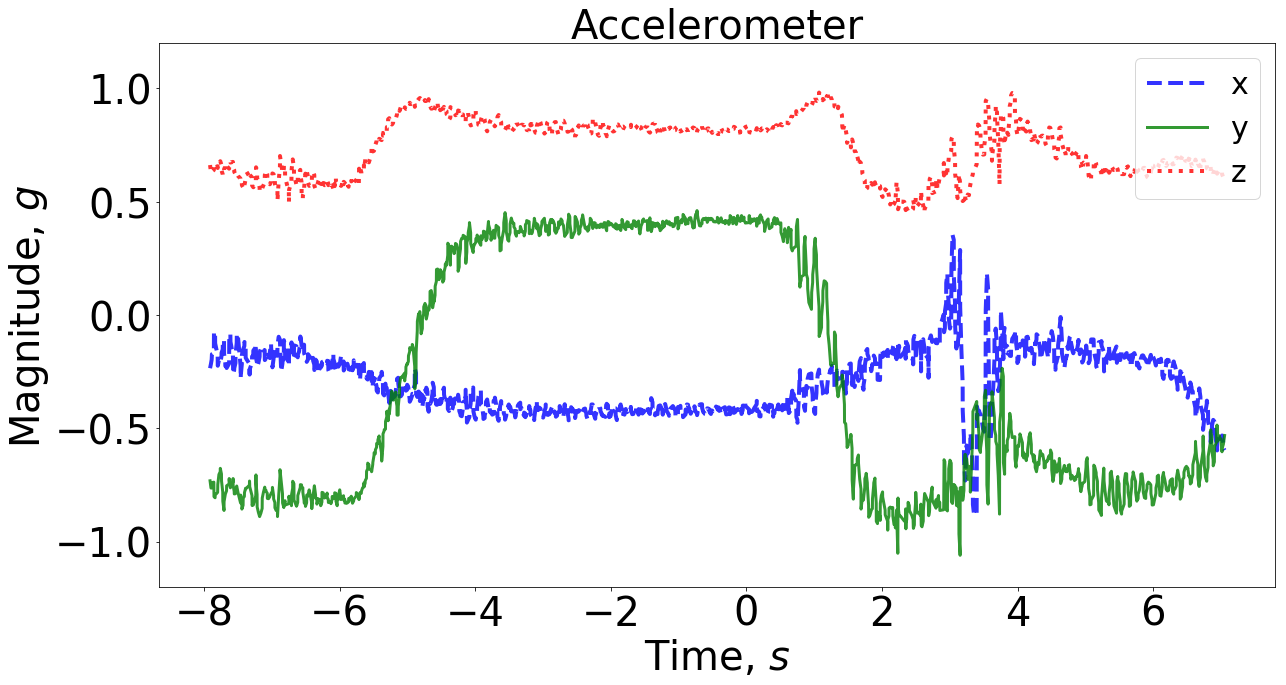

In [0]:
file_list = os.listdir()
for file in file_list:
    if (file[-4:] == '.csv'):
        ex = pd.read_csv(file) 
        if (file[3] != '_'):
            i = 10 + int(file[3])
        else:
            i = int(file[2])
        if i != 7:
            continue
        t = ex["time, s"]    
        l_i = np.argwhere(t > 0)
        #print(t_start[i-1])
        if (t_start[i-1]< 10000):
            #print(l_i[0][0], file)

            f = plt.figure(file[:-4], figsize= (20,10))
#             ax0= f.subplots(1,1)
            newex = ex[2:1500]
            plt.plot(newex["time, s"] - 8, newex["acc_x, mg"]/1000, '--b', linewidth = 4, label = 'x', alpha = 0.8)    
            plt.plot(newex["time, s"] - 8, newex["acc_y, mg"]/1000, 'g',   linewidth = 3, label = 'y', alpha = 0.8)    
            plt.plot(newex["time, s"] - 8, newex["acc_z, mg"]/1000, ':r',   linewidth = 4, label = 'z', alpha = 0.8)
            plt.title("Accelerometer", fontsize = 20*2)
            plt.legend(loc='upper right', fontsize = 15*2)
#                 ax0.legend(['x std %0.1f' %ff(newex["acc_x, mg"].values), 
#                             'y std %0.1f' %ff(newex["acc_y, mg"].values),
#                             'z std %0.1f' %ff(newex["acc_z, mg"].values)], loc = 1, fontsize = 12)
            plt.xlabel('Time, $s$', fontsize = 2*20)
            plt.ylabel('Magnitude, $g$', fontsize = 2*20)
            plt.ylim(-1.2, 1.2)
            plt.xticks(fontsize = 40)
            plt.yticks(fontsize = 40)

            plt.savefig('C:/Users/1/Desktop/illness.jpg')
#             ax1.plot(newex["time, s"], newex["gyr_x, dps"], c= 'b', label = 'x')    
#             ax1.plot(newex["time, s"], newex["gyr_y, dps"], c= 'g', label = 'y')    
#             ax1.plot(newex["time, s"], newex["gyr_z, dps"], c= 'r', label = 'z')
#             ax1.set_title("gyr")
            
#             ax2.plot(newex["time, s"], newex["mag_x, mga"], c= 'b', label = 'x')    
#             ax2.plot(newex["time, s"], newex["mag_y, mga"], c= 'g', label = 'y')    
#             ax2.plot(newex["time, s"], newex["mag_z, mga"], c= 'r', label = 'z')
#             ax2.set_title("mag")
#             os.chdir("C:/Users/1/Desktop/Parkinson/"+ str(21) + "/pic")
#             f.savefig(file[:4] + '_21.png')
#             os.chdir("C:/Users/1/Desktop/Parkinson/21")

In [0]:
parkinson = newex

In [0]:
os.chdir("E:/parkinson/16")
#t_start = [0, 1000000, 30, 3.333, 5, 0, 0, 0, 37, 1000000, 6 , 20, 28]
t_start = [0 for i in range(13)]
t_start
len(t_start)
file_list = os.listdir()
file_list

['ex10_2019-01-25 15_01_32.avi',
 'ex10_2019-01-25 15_01_32.wav',
 'ex10_2019-01-25 15_01_32_to_2019-01-25 15_02_24.csv',
 'ex11_2019-01-25 15_02_32.avi',
 'ex11_2019-01-25 15_02_32.wav',
 'ex11_2019-01-25 15_02_32_to_2019-01-25 15_03_30.csv',
 'ex12_2019-01-25 15_03_37.avi',
 'ex12_2019-01-25 15_03_37.wav',
 'ex12_2019-01-25 15_03_37_to_2019-01-25 15_04_25.csv',
 'ex13_2019-01-25 15_04_33.avi',
 'ex13_2019-01-25 15_04_33.wav',
 'ex13_2019-01-25 15_04_33_to_2019-01-25 15_04_48.csv',
 'ex1_2019-01-25 14_55_17.avi',
 'ex1_2019-01-25 14_55_17.wav',
 'ex1_2019-01-25 14_55_17_to_2019-01-25 14_55_31.csv',
 'ex2_2019-01-25 14_55_38.avi',
 'ex2_2019-01-25 14_55_38.wav',
 'ex2_2019-01-25 14_55_38_to_2019-01-25 14_56_23.csv',
 'ex3_2019-01-25 14_56_30.avi',
 'ex3_2019-01-25 14_56_30.wav',
 'ex3_2019-01-25 14_56_30_to_2019-01-25 14_56_41.csv',
 'ex4_2019-01-25 14_56_48.avi',
 'ex4_2019-01-25 14_56_48.wav',
 'ex4_2019-01-25 14_56_48_to_2019-01-25 14_56_57.csv',
 'ex5_2019-01-25 14_57_05.avi',
 'ex

10
11
12
13
1
2
3
4
5
6
7
8
9


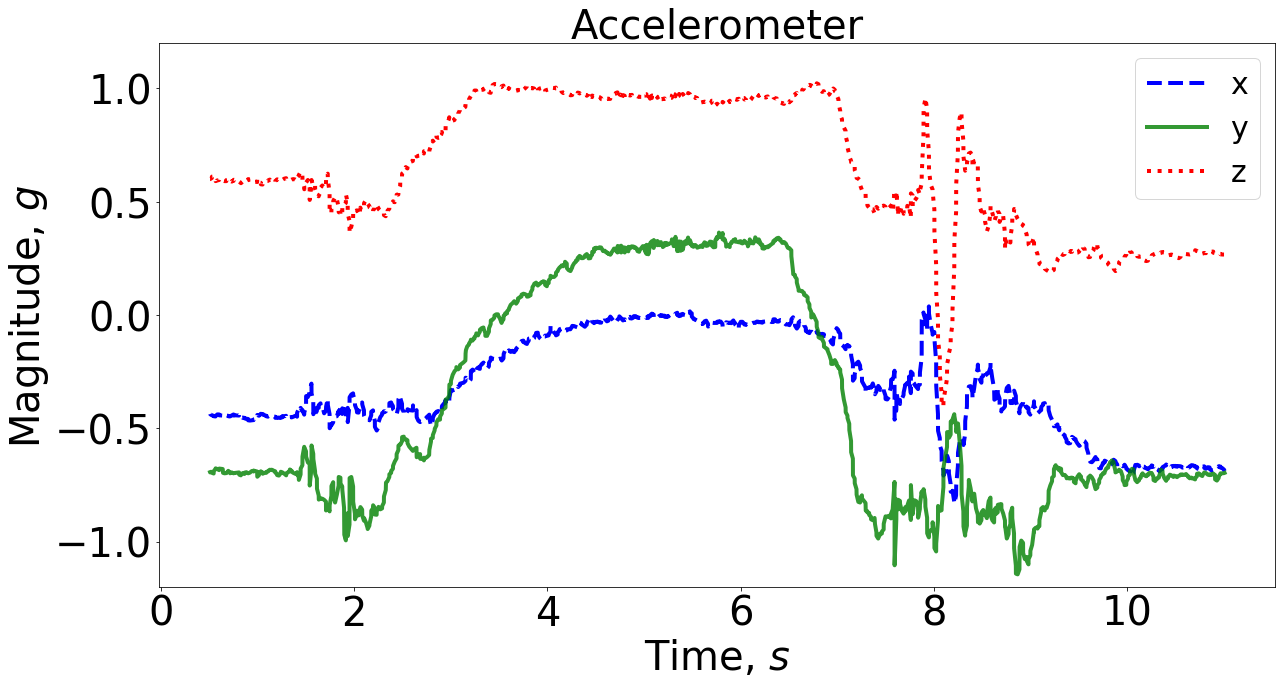

In [0]:
file_list = os.listdir()
for file in file_list:
    if (file[-4:] == '.csv'):
        ex = pd.read_csv(file) 
        if (file[3] != '_'):
            i = 10 + int(file[3])
        else:
            i = int(file[2])
        print(i)
        if i == 7:
            t = ex["time, s"]    
            l_i = np.argwhere(t > 8.5)
            #print(t_start[i-1])
            if (t_start[i-1]< 10000):
                #print(l_i[0][0], file)

                f = plt.figure(file[:-4], figsize= (10*2,2*5))
#                 ax0 = f.subplots(1,1)plt.figure(0, figsize=(10,5))
                newex = ex[l_i[0][0]:5500]
                plt.plot(newex["time, s"] - 8, newex["acc_x, mg"]/1000, '--b', linewidth = 4, label = 'x')    
                plt.plot(newex["time, s"] - 8, newex["acc_y, mg"]/1000, 'g',   linewidth = 4, label = 'y', alpha = 0.8)    
                plt.plot(newex["time, s"] - 8, newex["acc_z, mg"]/1000, ':r',   linewidth = 4, label = 'z')
                plt.title("Accelerometer", fontsize = 20*2)
                plt.legend(fontsize = 15*2)
#                 ax0.legend(['x std %0.1f' %ff(newex["acc_x, mg"].values), 
#                             'y std %0.1f' %ff(newex["acc_y, mg"].values),
#                             'z std %0.1f' %ff(newex["acc_z, mg"].values)], loc = 1, fontsize = 12)
                plt.xlabel('Time, $s$', fontsize = 2*20)
                plt.ylabel('Magnitude, $g$', fontsize = 2*20)
                plt.ylim(-1.2, 1.2)
                plt.xticks(fontsize = 40)
                plt.yticks(fontsize = 40)
                
                plt.savefig('C:/Users/1/Desktop/Healthy.jpg')
#                     ('b', 'g', 'r'), ('std' + str(np.std(newex["acc_x, mg"])), 
#                                              'std' + str(np.std(newex["acc_y, mg"])),
#                                              'std' + str(np.std(newex["acc_z, mg"])) ) )
#                 ax1.plot(newex["time, s"], newex["gyr_x, dps"], c= 'b', label = 'x')    
#                 ax1.plot(newex["time, s"], newex["gyr_y, dps"], c= 'g', label = 'y')    
#                 ax1.plot(newex["time, s"], newex["gyr_z, dps"], c= 'r', label = 'z')
#                 ax1.set_title("gyr")

#                 ax2.plot(newex["time, s"], newex["mag_x, mga"], c= 'b', label = 'x')    
#                 ax2.plot(newex["time, s"], newex["mag_y, mga"], c= 'g', label = 'y')    
#                 ax2.plot(newex["time, s"], newex["mag_z, mga"], c= 'r', label = 'z')
#                 ax2.set_title("mag")
    #             os.chdir("C:/Users/1/Desktop/Parkinson/"+ str(21) + "/pic")
    #             f.savefig(file[:4] + '_21.png')
    #             os.chdir("C:/Users/1/Desktop/Parkinson/21")

In [0]:
health = newex

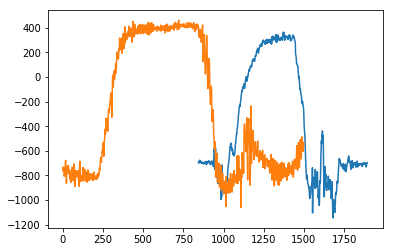

In [0]:
plt.plot(health['acc_y, mg'])
plt.plot(parkinson['acc_y, mg'])

In [0]:
parkinson.values.shape

(1498, 10)

In [0]:
signal.ricker()

TypeError: ricker() missing 2 required positional arguments: 'points' and 'a'

In [0]:
def sin(w):
    x = np.linspace(-np.pi, np.pi, num = 50)
    return np.sin(2*np.pi*w*x)
sign = np.array()
for i,w in enumerate(np.arange(1, 11, 0.1)):
    sinus = sin(len(parkinson['acc_y, mg'], w)
    sign[i] = signal.correlate(parkinson['acc_y, mg'], sinus)
plt.imshow(sign, cmap='PRGn', aspect='auto',
           vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
plt.show()

SyntaxError: invalid syntax (<ipython-input-15-acbb12564cb6>, line 7)

In [0]:
N = 10
x_filt_h = health['acc_y, mg'].rolling(window=N + 1)
x_filt_h_mean = x_filt_h.mean()/1000
x_filt_p = parkinson['acc_y, mg'].rolling(window=N + 1)
x_filt_p_mean = x_filt_p.mean()/1000
std_h = (health['acc_y, mg']/1000 - x_filt_h_mean)[N:]
# std_h = np.clip(std_h, -500, 500)
std_p = (parkinson['acc_y, mg']/1000 - x_filt_p_mean)[N:]
# std_p = np.clip(std_p, -500, 500)


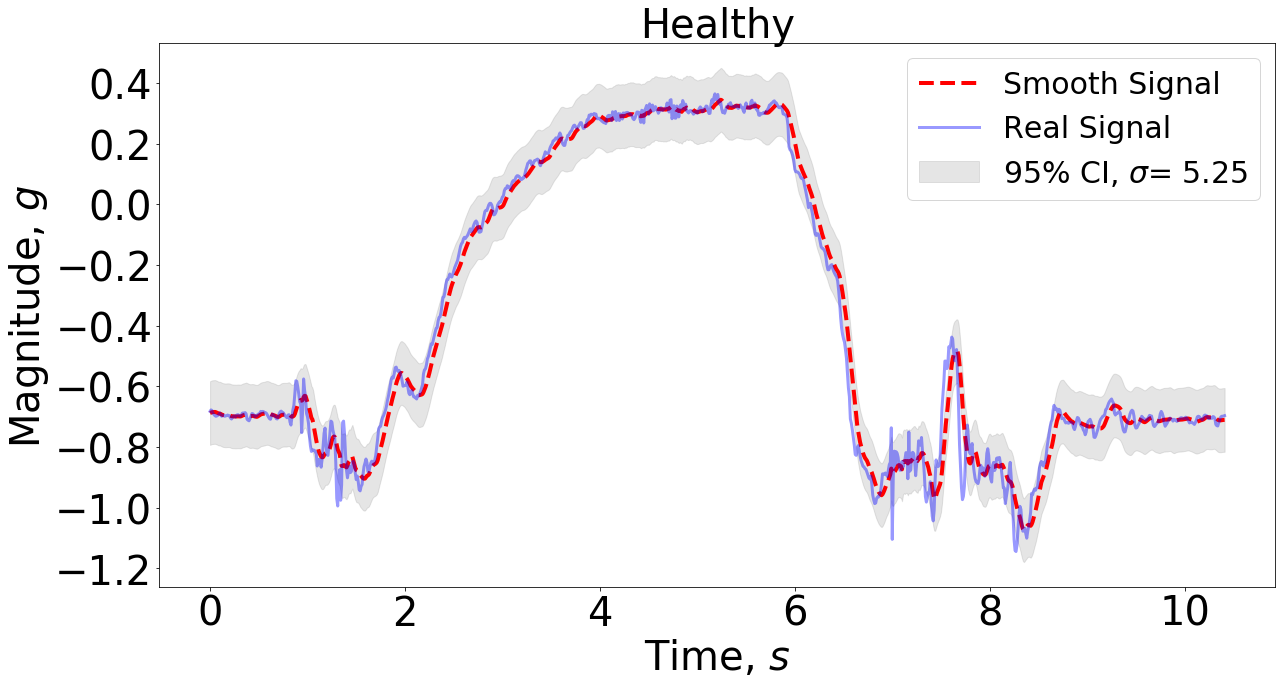

In [0]:
std = np.std(std_h)*len(std_h)/(len(std_h)-1)
plt.figure(0, figsize=(10*2,2*5))
plt.plot(np.arange(len(health['acc_y, mg']) - N)/100, x_filt_h_mean[N:],  '--r', linewidth = 4,  label = 'Smooth Signal')
plt.fill_between(np.arange(len(health['acc_y, mg']) - N)/100, x_filt_h_mean[N:] - 2*std, x_filt_h_mean[N:] + 2*std , color = 'grey', alpha = 0.2, 
                 label = '95% CI, $\sigma$'+ '= %.2f' % (100*std))
plt.plot(np.arange(len(health['acc_y, mg']) - N)/100, health['acc_y, mg'][N:]/1000, c = 'b', linewidth = 3, label = 'Real Signal', alpha= 0.4)
plt.xticks(fontsize = 40)
plt.yticks(fontsize = 40)
plt.title('Healthy', fontsize = 40)
plt.xlabel("Time, $s$", fontsize = 40)
plt.ylabel("Magnitude, $g$", fontsize = 40)
plt.legend(fontsize = 30)

plt.savefig('C:/Users/1/Desktop/Health.jpg')

# plt.figure(1, figsize = (10,5))
# plt.plot(np.arange(len(health['acc_y, mg']) - N)[600:700], x_filt_h_mean[600:700], c = 'r', label = 'Smooth Signal')
# plt.fill_between(np.arange(len(health['acc_y, mg']) - N)[600:700], x_filt_h_mean[600:700] - 2*std, x_filt_h_mean[600:700] + 2*std , color = 'grey', alpha = 0.2, 
#                  label = '95% CI, $\sigma$ =' +  str(round(std)))
# plt.plot(np.arange(len(health['acc_y, mg']) - N)[600:700], health['acc_y, mg'][600:700], c = 'b', label = 'Real Signal', alpha= 0.4)

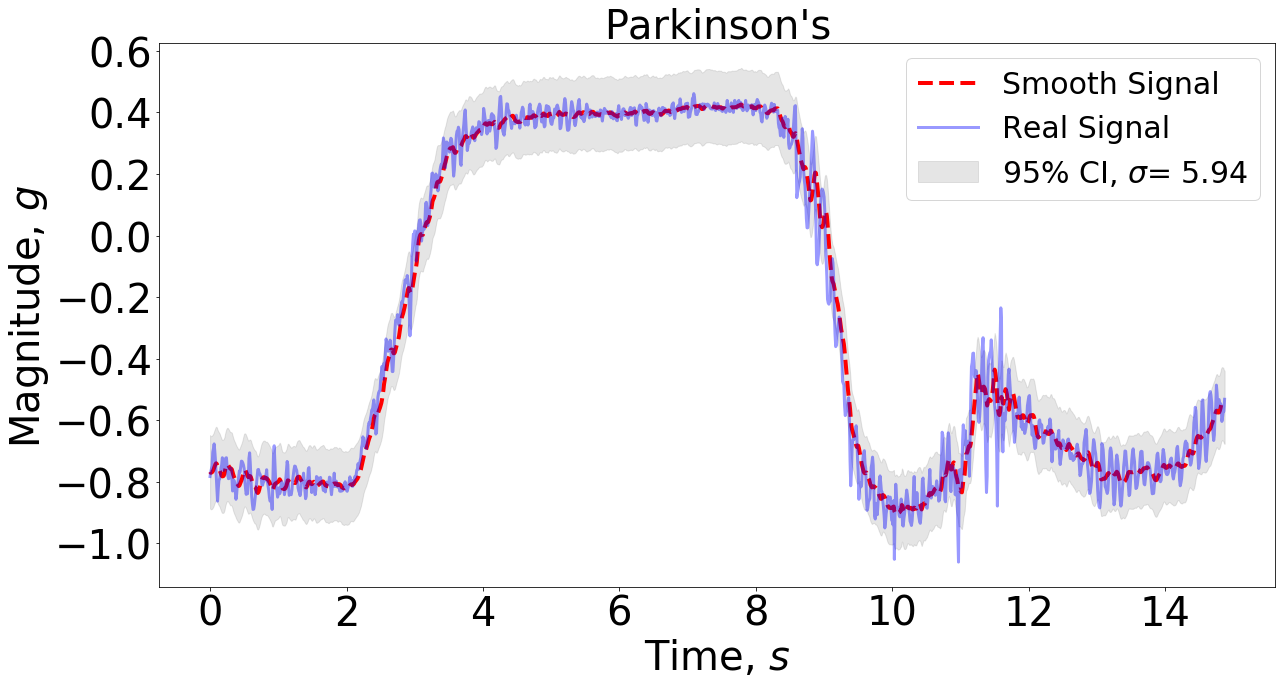

In [0]:
std = np.std(std_p)*len(std_p)/(len(std_p)-1)
plt.figure(0, figsize=(10*2,10))
plt.plot(np.arange(len(parkinson['acc_y, mg']) - N)/100, x_filt_p_mean[N:], '--r', linewidth = 4, label = 'Smooth Signal')
plt.fill_between(np.arange(len(parkinson['acc_y, mg']) - N)/100, x_filt_p_mean[N:] - 2*std, x_filt_p_mean[N:] + 2*std , color = 'grey', alpha = 0.2, 
                 label = '95% CI, $\sigma$'+ '= %.2f' % (100*std))
plt.plot(np.arange(len(parkinson['acc_y, mg']) - N)/100, parkinson['acc_y, mg'][N:]/1000, 'b', linewidth = 3, label = 'Real Signal', alpha = 0.4)
plt.xticks(fontsize = 40)
plt.yticks(fontsize = 40)
plt.title("Parkinson's", fontsize = 40)
plt.xlabel("Time, $s$", fontsize = 40)
plt.ylabel("Magnitude, $g$", fontsize = 40)
plt.legend(fontsize = 30)

plt.savefig("C:/Users/1/Desktop/Parkinson.jpg")


1042 1042
1042 1042
-0.09399999999999231 1.0676363636363622
0.033449310766009425 0.04023228250244379


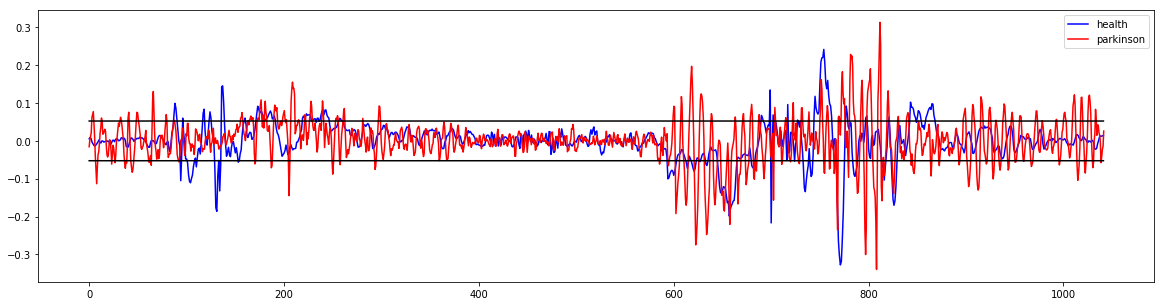

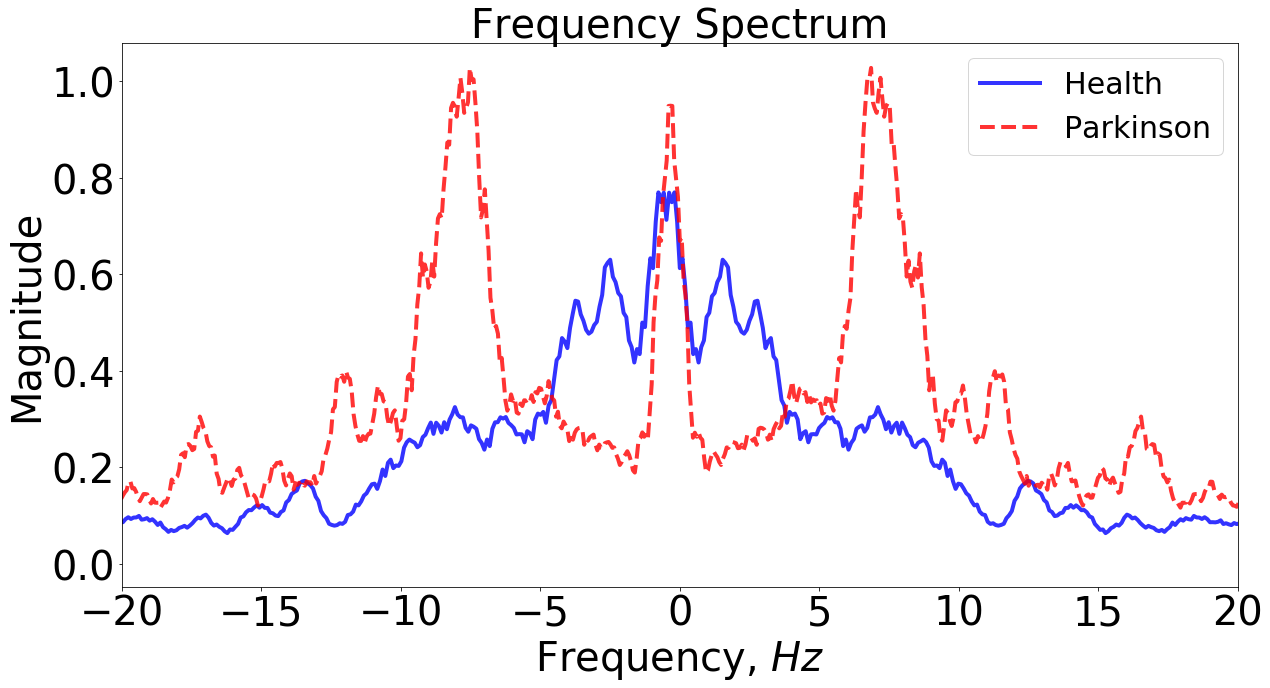

In [0]:
plt.figure(1, figsize= (20,5))
plt.plot(np.arange(len(std_h)), std_h, c = 'b', label = 'health')
plt.plot(np.arange(len(std_p))*len(std_h)/len(std_p), std_p, c = 'r', label = 'parkinson')
plt.plot(np.arange(len(std_h)), np.zeros(len(std_h)) + np.std(std_h), c = 'black')
plt.plot(np.arange(len(std_h)), np.zeros(len(std_h)) - np.std(std_h), c = 'black')
plt.legend()
plt.figure(2, figsize= (20,10))
fft_noise_h = np.fft.fft(std_h)
fft_noise_p = np.fft.fft(std_p)
freq_noise_h = np.fft.fftfreq(len(fft_noise_h), 0.01)
freq_noise_p = np.fft.fftfreq(len(fft_noise_p), 0.01)
labels_noise_h = np.argsort(freq_noise_h)
labels_noise_p = np.argsort(freq_noise_p)
print(len(freq_noise_h), len(fft_noise_h))
conv = np.convolve(np.abs(fft_noise_h)[labels_noise_h], np.ones(11)/11)[10:]
a = 1.3*conv.max()
print(len(conv), len(labels_noise_h))
plt.plot(freq_noise_h[labels_noise_h], conv/a, 'b', linewidth = 4, alpha = 0.8, label = 'Health')
conv = np.convolve(np.abs(fft_noise_p)[labels_noise_p], np.ones(11)/11)[10:]
plt.plot(freq_noise_p[labels_noise_p], conv/a, '--r', linewidth = 4, alpha = 0.8, label = 'Parkinson')
plt.title("Frequency Spectrum", fontsize = 40)
plt.xlabel("Frequency, $Hz$", fontsize = 40)
plt.ylabel("Magnitude", fontsize = 40)
plt.xticks(fontsize = 40)
plt.yticks(fontsize = 40)
plt.legend(fontsize = 30)
plt.xlim(-20,20)
plt.savefig("C:/Users/1/Desktop/Spectrum.jpg")
print(std_h.sum(), std_p.sum())
print(np.abs(std_h).mean(), np.abs(std_p).mean())

1057 1057
1057 1057
-0.09399999999999231 1.0676363636363622


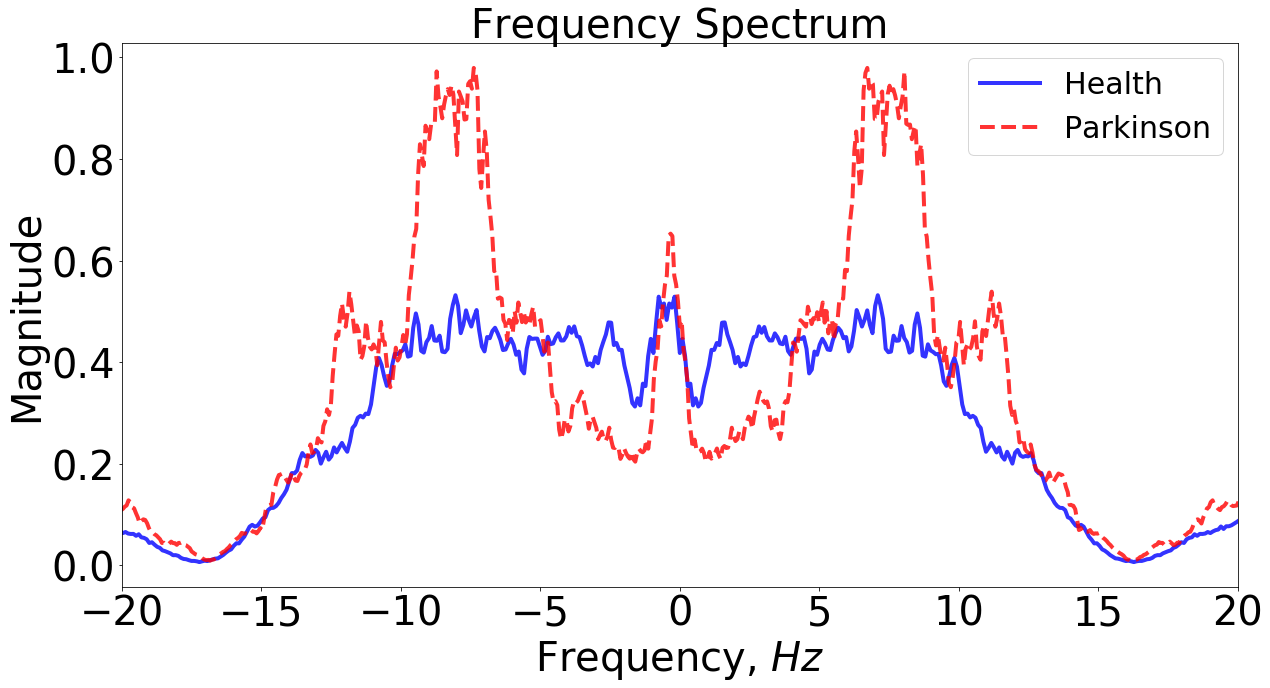

In [0]:
plt.figure(figsize= (20,10))
fft_noise_h = np.fft.fft(np.convolve(health['acc_y, mg'], np.array([1,-1,1,-1,1,-1])))
fft_noise_p = np.fft.fft(np.convolve(parkinson['acc_y, mg'], np.array([1,-1,1,-1,1,-1])))

# fft_noise_h = np.fft.fft(health['acc_y, mg'])
# fft_noise_p = np.fft.fft(parkinson['acc_y, mg'])

freq_noise_h = np.fft.fftfreq(len(fft_noise_h), 0.01)
freq_noise_p = np.fft.fftfreq(len(fft_noise_p), 0.01)
labels_noise_h = np.argsort(freq_noise_h)
labels_noise_p = np.argsort(freq_noise_p)
print(len(freq_noise_h), len(fft_noise_h))
conv = np.convolve(np.abs(fft_noise_h)[labels_noise_h], np.ones(11)/11)[10:]
# conv  = np.abs(fft_noise_h)[labels_noise_h]
print(len(conv), len(labels_noise_h))
a = conv.max()
# labels_plot = np.abs(freq_noise_h[labels_noise_h]) > 2
plt.plot(freq_noise_h[labels_noise_h], conv/7000, 'b', linewidth=4, alpha = 0.8, label = 'Health')
conv = np.convolve(np.abs(fft_noise_p)[labels_noise_p], np.ones(11)/11)[10:]
# conv  = np.abs(fft_noise_p)[labels_noise_p]
# labels_plot = np.abs(freq_noise_p[labels_noise_p]) > 2
plt.plot(freq_noise_p[labels_noise_p], conv/7000, '--r', linewidth=4, alpha = 0.8, label = 'Parkinson')
plt.title("Frequency Spectrum", fontsize = 40)
plt.xlabel("Frequency, $Hz$", fontsize = 40)
plt.ylabel("Magnitude", fontsize = 40)
plt.xticks(fontsize = 40)
plt.yticks(fontsize = 40)
plt.legend(fontsize = 30)
plt.xlim(-20,20)
# plt.ylim(0, 1)
plt.savefig("C:/Users/1/Desktop/Spectrum_all_highpassfilter.jpg")
print(std_h.sum(), std_p.sum())

1057 1057


(-20, 20)

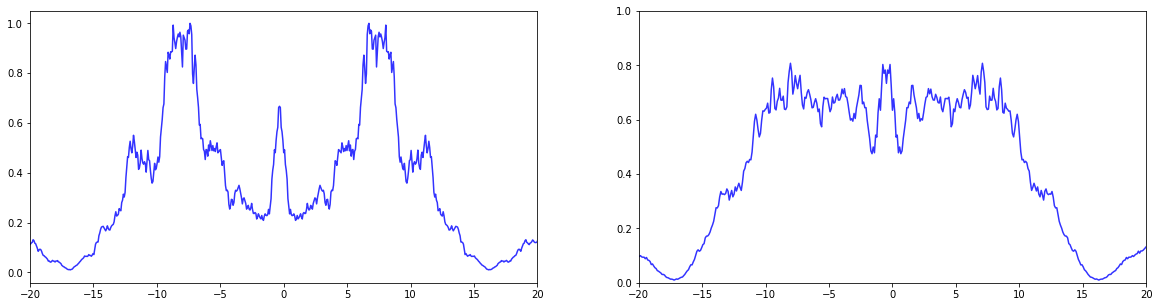

In [0]:
from scipy.optimize import curve_fit
conv = np.convolve(np.abs(fft_noise_p)[labels_noise_p], np.ones(11)/11)[10:]
f, (ax0, ax1) = plt.subplots(1, 2, figsize = (20,5))
ax0.plot(freq_noise_p[labels_noise_p], conv/conv.max(), c = 'b', alpha = 0.8)
ax0.set_xlim(-20, 20)
conv = np.convolve(np.abs(fft_noise_h)[labels_noise_h], np.ones(11)/11)[10:]
print(len(conv), len(labels_noise_h))
ax1.plot(freq_noise_h[labels_noise_h], conv/conv.max(), c = 'b', alpha = 0.8, label = 'Health')
ax1.set_ylim(0, 1)
ax1.set_xlim(-20, 20)